# Displaying the dataset for the Arcachon Basin
Data were provided through SeaDataNet Pan-European infrastructure for ocean and marine data management
(https://www.seadatanet.org)

## Import libraries and load dataset

In [168]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import pandas as pd

In [169]:
data1 = pd.read_csv("./arcachon_plus_bathymetry/dataset_mieux.xyz", sep=",", header=2)
data2=pd.read_csv("./arcachon_bathymetry/dataset.xyz", sep=",", header=2)
data3 = pd.read_csv("./Atlantic_bathymetry/atlantic_treated_data.csv", sep=",", header=2)


## Process datas
Transform csv data to numpy arrays to be plotted

Correct for real depth (opposite of dataset depth), and translate to the average tide of $1.980m$ for Arcachon Basin

In [174]:
def read_data(data, inv):
    data = data.rename(columns={"long(DD)": "long", "lat(DD)": "lat", "depth(m - down positive - LAT)": "depth"})
    data["depth"] = data["depth"] + 1.9860
    data.drop(data[inv*data.depth <= 0].index, inplace=True)
    depth = data["depth"]
    depth = depth*-inv

    long = data["long"].to_numpy()
    lat = data["lat"].to_numpy()

    depth = depth
    long = (long - min(long))*11100
    lat = (lat - min(lat))*11100
    return long, lat, depth


## Fusioning datas

In [171]:
values1 = read_data(data1, 1)
values2 = read_data(data2, 1)
values3 = read_data(data3, -1)
long_aux = np.append(values1[0], values2[0])
long=np.append(long_aux,values3[0])
lat_aux = np.append(values1[1], values2[1])
lat=np.append(lat_aux,values3[1])
depth_aux = np.append(values1[2], values2[2])
depth=np.append(depth_aux,values3[2])


print("Data size: ",len(long))


Data size:  37444


## Plot data

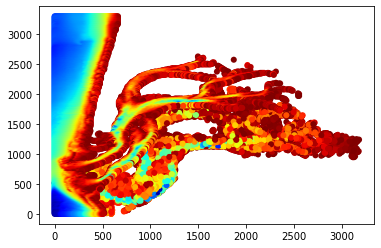

In [172]:
plt.figure()
plt.scatter(long, lat, c=depth, cmap="jet",linewidths=0.05)
plt.clim(vmin=-25,vmax=0)
plt.show()

## Maillage

In [193]:
import pyvista as pv
points = np.array([long,lat,depth]).T
cloud = pv.PolyData(points)
grid = cloud.delaunay_2d(alpha=25)
#grid.plot(show_edges=True, eye_dome_lighting=True)
grid.plot(show_edges=True)

PolyData (0x7f44db9844b0)
  N Cells:	37444
  N Points:	37444
  X Bounds:	0.000e+00, 3.178e+03
  Y Bounds:	0.000e+00, 3.300e+03
  Z Bounds:	-3.089e+01, -4.000e-03
  N Arrays:	0



ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)